# Results & Conclusions

**In this notebook, we will attempt to answer our research question about whether or not variable importance in our win probability model changes over time.**

In [34]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
from matplotlib  import cm
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')

In [35]:
# import scraped data
pbp = pd.read_csv("pbp2.csv")
pbp = pbp.iloc[:,1:]

In [38]:
# grab the relevant columns for model building
var = list(pbp.columns[4:])
var.remove('AWAY_WIN')
var.remove('primary_player')
var.remove('gameID')
var.remove('awayscore')
var.remove('homescore')
var.remove('awayLead')
var.remove('minutesRemaining')
var.remove('awayRun')
var.remove('shotDistance')

[0]	eval-auc:0.508086	train-auc:0.521283
[1]	eval-auc:0.514391	train-auc:0.526591
[2]	eval-auc:0.513901	train-auc:0.526625
[3]	eval-auc:0.514213	train-auc:0.526644
[4]	eval-auc:0.514448	train-auc:0.526645
[5]	eval-auc:0.514448	train-auc:0.526645
[6]	eval-auc:0.514448	train-auc:0.526645
[7]	eval-auc:0.514448	train-auc:0.526645
[8]	eval-auc:0.514448	train-auc:0.526645
[9]	eval-auc:0.514448	train-auc:0.526645
[0]	eval-auc:0.511184	train-auc:0.522367
[1]	eval-auc:0.514227	train-auc:0.526962
[2]	eval-auc:0.51574	train-auc:0.52854
[3]	eval-auc:0.515886	train-auc:0.528528
[4]	eval-auc:0.515331	train-auc:0.528549
[5]	eval-auc:0.51574	train-auc:0.52854
[6]	eval-auc:0.51574	train-auc:0.52854
[7]	eval-auc:0.51574	train-auc:0.52854
[8]	eval-auc:0.51574	train-auc:0.52854
[9]	eval-auc:0.51574	train-auc:0.52854
[0]	eval-auc:0.529586	train-auc:0.542653
[1]	eval-auc:0.530541	train-auc:0.54334
[2]	eval-auc:0.531478	train-auc:0.543528
[3]	eval-auc:0.531451	train-auc:0.543535
[4]	eval-auc:0.531451	train-a

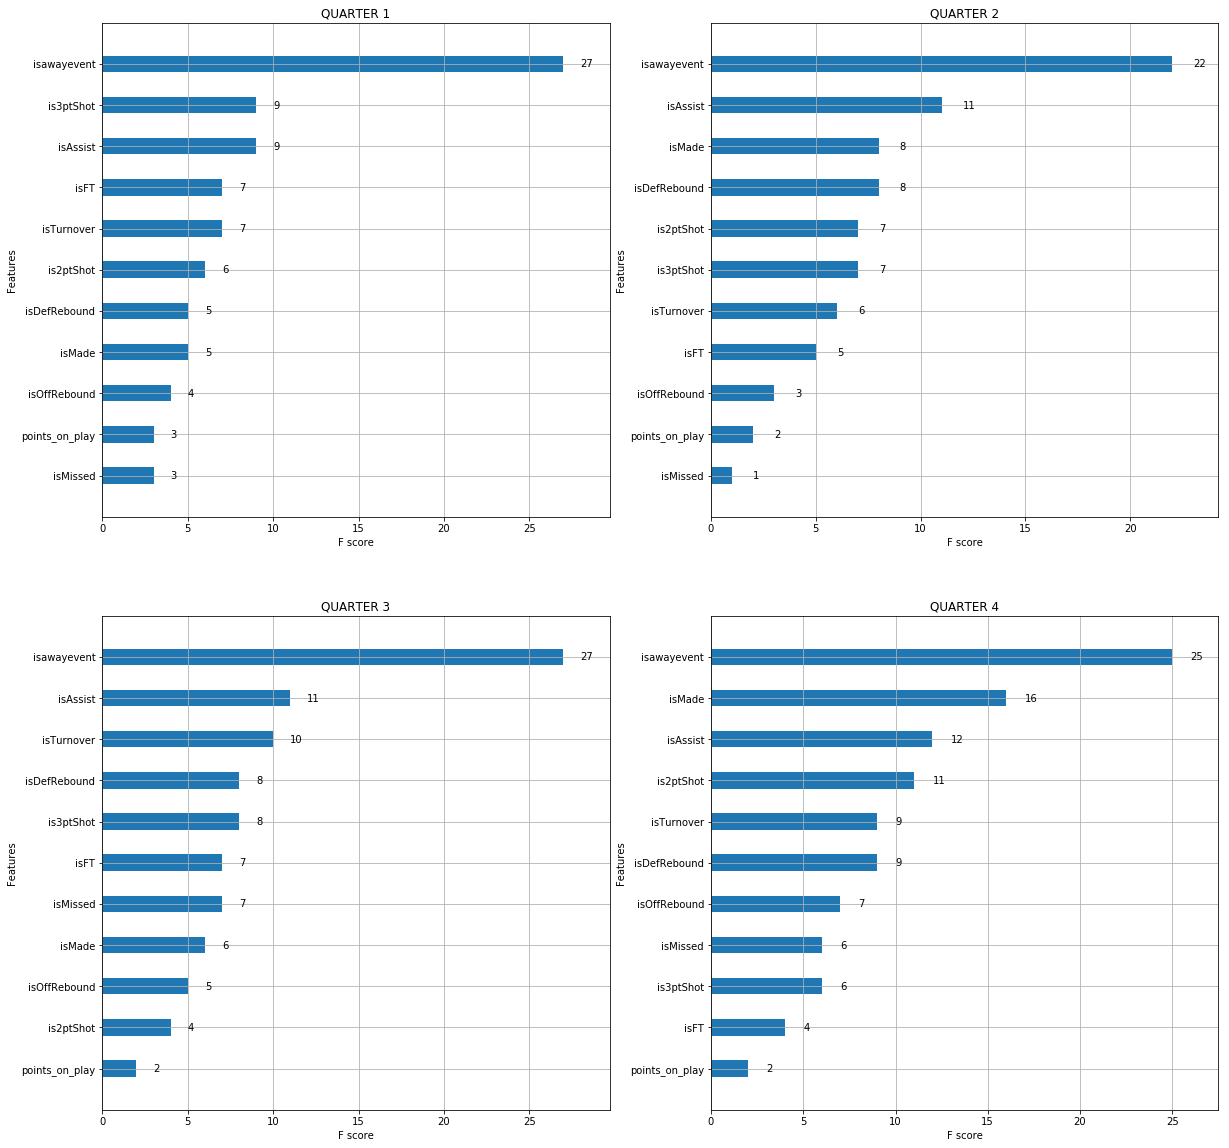

In [39]:
fig, ax = plt.subplots(2,2,figsize=(20,20))
for i in [1,2,3,4]:
    sub = pbp[pbp.quarter == i]
    
    msk = np.random.rand(len(sub)) < 0.3
    data_train = sub[msk]
    data_test = sub[~msk]
    
    data_tot = xgb.DMatrix(sub[var], label=sub.AWAY_WIN)
    dtrain = xgb.DMatrix(data_train[var], label=data_train.AWAY_WIN)
    dtest = xgb.DMatrix(data_test[var], label=data_test.AWAY_WIN)
    param = {'max_depth': 5, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
    param['nthread'] = 4
    param['eval_metric'] = 'auc'
    num_round = 10
    evallist = [(dtest, 'eval'), (dtrain, 'train')]
    bst = xgb.train(param, dtrain, num_round, evallist)
    
    if i == 1:
        xgb.plot_importance(bst, ax=ax[0][0], title="QUARTER 1", height=0.4)
    if i == 2:
        xgb.plot_importance(bst, ax=ax[0][1], title="QUARTER 2", height=0.4)
    if i == 3:
        xgb.plot_importance(bst, ax=ax[1][0], title="QUARTER 3", height=0.4)
    if i == 4:
        xgb.plot_importance(bst, ax=ax[1][1], title="QUARTER 4", height=0.4)


**Summary of Findings:**
- Having already explained the results from the overall model building, we can explore the results from the research question. 
- The goal of the research question is to find which event types are significant at different points of the game.
- Understandably, 'isawayevent' is consistently important in predicting away win.
- However, as anticipated, the other variables shuffle around in importance depending on the quarter.
- For example, 3pt shots attempts are more important in the first quarter according to the model perhaps because teams who get early leads with these shots tend to win.
- Turnovers become more and more important from quarter to quarter which makes sense in the context of the game.
- Lastly, misses become more and more important as the game gets late.

**How We Would Improve Models & Results with More Time To Explore:**
- Engineer several more predictor variables, such as current winning streak (or losing streak) for each team, players on the court during any given event, fouls per player, or several others.
- Build different models from our predictors, such as a decision tree or some other non-parametric model like knn.
- Explore the data more thoroughly through EDA and develop other, more in-depth, research questions